In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

In [3]:
np.random.seed(42)  

In [4]:
def MSE(y,y_pred):
    mse = np.mean((y - y_pred)**2)
    return mse

def r2_score(y_true, y_pred):
    return 1 - np.sum((y_true - y_pred)**2) / np.sum((y_true - np.mean(y_true))**2)

In [5]:
y = np.array([3, -0.5, 2, 7])         
y_pred = np.array([2.5, 0.0, 2, 8])    
print(MSE(y,y_pred))  
print(r2_score(y, y_pred))

0.375
0.9486081370449679


In [6]:
X = np.linspace(-10 ,10 ,200)
y_true = 2*X + 4 

In [7]:
# Add Gaussian noise (mean=0, std=2)
noise = np.random.normal(0, 2, len(X))
y = y_true + noise

In [8]:
data = []
for label, (start, end) in {
    "First Samples": (0, 3),
    "Middle Samples": (98, 101),
    "Last Samples": (197, 200)
}.items():
    for i in range(start, end):
        data.append({
            "Group": f"{label} ({i+1})",
            "X": X[i],
            "y (True)": y_true[i],
            "y (Noisy)": y[i]
        })

df = pd.DataFrame(data).reset_index(drop=True)  # Unique index

# Styling
styled_df = df.style \
    .format("{:.3f}", subset=["X", "y (True)", "y (Noisy)"]) \
    .set_caption("<h2 style='text-align: center; color: #2e6c80;'>X and y Samples with Noise</h2>") \
    .background_gradient(subset=["X"], cmap="YlGn") \
    .background_gradient(subset=["y (True)"], cmap="Blues") \
    .background_gradient(subset=["y (Noisy)"], cmap="OrRd") \
    .set_properties(**{
        'text-align': 'center',
        'font-family': 'Arial',
        'border': '1px solid #ddd'
    })

display(styled_df)

,Group,X,y (True),y (Noisy)
0,First Samples (1),-10.000,-16.000,-15.007
1,First Samples (2),-9.899,-15.799,-16.076
2,First Samples (3),-9.799,-15.598,-14.303
3,Middle Samples (99),-0.151,3.698,3.709
4,Middle Samples (100),-0.050,3.899,3.430
5,Middle Samples (101),0.050,4.101,1.270
6,Last Samples (198),9.799,23.598,23.905
7,Last Samples (199),9.899,23.799,23.915
8,Last Samples (200),10.000,24.000,21.714


In [9]:
print("len(X):",len(X))
print("len(y):",len(y))

len(X): 200
len(y): 200


# Pearson Correlation Coefficient

## Mathematical Formula

The Pearson correlation coefficient (r) between two variables X and Y is calculated as:

$$
r_{XY} = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y} = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum_{i=1}^{n} (X_i - \bar{X})^2} \sqrt{\sum_{i=1}^{n} (Y_i - \bar{Y})^2}}
$$

Where:
- $n$ = number of observations
- $\bar{X}$, $\bar{Y}$ = means of X and Y
- $\sigma_X$, $\sigma_Y$ = standard deviations of X and Y

## Python Implementation

In [10]:
cov_xy = np.mean(X * y) - np.mean(X) * np.mean(y)
var_x = np.var(X)
var_y = np.var(y)
std_x = np.sqrt(var_x)
std_y = np.sqrt(var_y)

In [11]:
corr_xy = cov_xy/(std_y * std_x)
corr_xy

0.9877708824128717

In [12]:
def correlation_coefficient(X, y):
    # Convert to numpy arrays
    #X = np.array(X)
    #y = np.array(y)
    
    # Calculate covariance matrix
    cov_matrix = np.cov(X, y, ddof=0)  # ddof=0 for population covariance
    
    # Extract covariance and variances
    cov_xy = cov_matrix[0, 1]
    var_x = cov_matrix[0, 0]
    var_y = cov_matrix[1, 1]
    
    # Calculate correlation coefficient
    correlation = cov_xy / np.sqrt(var_x * var_y)
    
    return correlation
corr = correlation_coefficient(X, y)
print(f"Pearson correlation coefficient: {corr:.4f}")

Pearson correlation coefficient: 0.9878


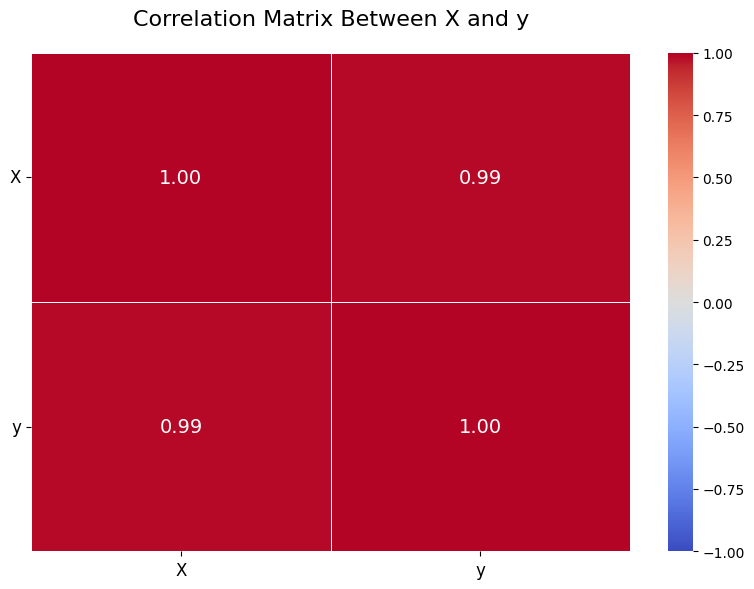

In [13]:
# Create a dataframe from the data
data = pd.DataFrame({'X': X, 'y': y})

# Calculate the correlation matrix
corr_matrix = data.corr()

# Display the correlation matrix beautifully
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            linewidths=0.5, 
            linecolor='white',
            fmt=".2f",
            annot_kws={"size": 14})

plt.title('Correlation Matrix Between X and y', fontsize=16, pad=20)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)
plt.tight_layout()
plt.show()

In [15]:
# Display first three samples
print("First three samples:")
print("X:", X[:3])
print("y:", y[:3])
print("\n...\n")

# Display three middle samples
middle_index = len(X) // 2
print("Three middle samples:")
print("X:", X[middle_index:middle_index+3])
print("y:", y[middle_index:middle_index+3])
print("\n...\n")

# Display last three samples
print("Last three samples:")
print("X:", X[-3:])
print("y:", y[-3:])

First three samples:
X: [-10.          -9.89949749  -9.79899497]
y: [-15.00657169 -16.07552358 -14.30261287]

...

Three middle samples:
X: [0.05025126 0.15075377 0.25125628]
y: [1.26976103 3.46021689 3.81708353]

...

Last three samples:
X: [ 9.79899497  9.89949749 10.        ]
y: [23.90544016 23.91541241 21.7140594 ]


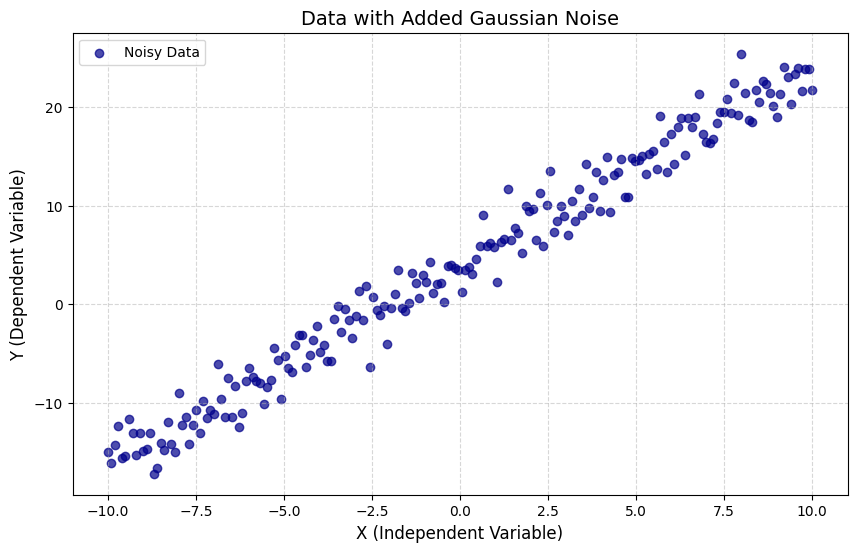

In [16]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='darkblue', label='Noisy Data', alpha=0.7)
plt.xlabel('X (Independent Variable)', fontsize=12)
plt.ylabel('Y (Dependent Variable)', fontsize=12)
plt.title('Data with Added Gaussian Noise', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [17]:
#n = len(X)
# Calculate means
x_mean = np.mean(X)
y_mean = np.mean(y) 
# Calculate slope (a)
numerator = np.sum((X - x_mean) * (y - y_mean))
denominator = np.sum((X - x_mean)**2)
a = numerator / denominator
# Calculate intercept (b)
b = y_mean - a * x_mean

In [18]:
print("a = ",a)
print("b = ",b)

a =  2.0228007618477117
b =  3.9184580696558307


In [19]:
# Calculate coefficients
y_pred = a*X + b

In [22]:
MSE(y,y_pred)

3.4322344743003375

In [23]:
r2_score(y, y_pred)

0.9756913161427032

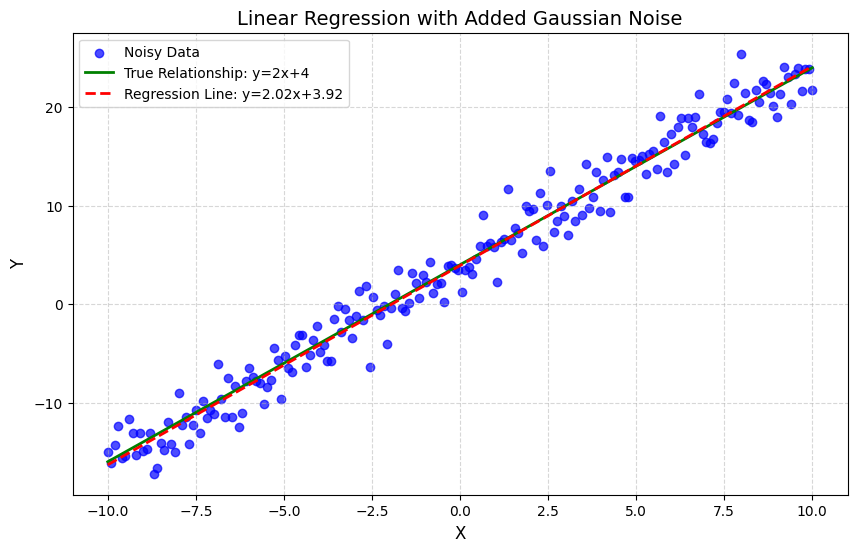

In [24]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Noisy Data', alpha=0.7)
plt.plot(X, y_true, 'g-', linewidth=2, label='True Relationship: y=2x+4')
plt.plot(X, y_pred, 'r--', linewidth=2, label=f'Regression Line: y={a:.2f}x+{b:.2f}')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Linear Regression with Added Gaussian Noise', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [ ]:
# Finish